# Sentiment Analysis Using Natural Language Processing Neural Network Code

## Research Question

Can the sentiment of a customer review be classified as positive or negative by a neural network accurately?

# Install Necessary Libraries

In [1]:
# For General Use:
!pip install pandas
!pip install numpy
!pip install keras
!pip install tensorflow

# Import Necessary Packages

In [2]:
# For General Use:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import nltk
from keras.layers import *

# For Cleaning:
import re

# For Lemmatizing:
from nltk.stem import WordNetLemmatizer

# For Stopwords:
from nltk.corpus import stopwords

#For Stemming:
from nltk.stem import PorterStemmer
porter=PorterStemmer()

# For Tokenize:
from nltk.tokenize import word_tokenize
from keras.preprocessing.text import Tokenizer

#For Vectorize:
from keras.preprocessing import sequence

# For Padding:
from tensorflow.keras.preprocessing.sequence import pad_sequences 

# For Modeling:
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping

#For Evaluation:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## Load Data Sets and Explore

In [3]:
# Define columns names for the data frame.
column_labels = ['Sentence', 'Score']

In [4]:
# Load Amazon text file to a data frame and review.
amazon = pd.read_csv('amazon_cells_labelled.txt', delimiter="\t", names=column_labels)
print(amazon)

                                              Sentence  Score
0    So there is no way for me to plug it in here i...      0
1                          Good case, Excellent value.      1
2                               Great for the jawbone.      1
3    Tied to charger for conversations lasting more...      0
4                                    The mic is great.      1
..                                                 ...    ...
995  The screen does get smudged easily because it ...      0
996  What a piece of junk.. I lose more calls on th...      0
997                       Item Does Not Match Picture.      0
998  The only thing that disappoint me is the infra...      0
999  You can not answer calls with the unit, never ...      0

[1000 rows x 2 columns]


In [5]:
# Load IMDB txt file to a data frame and review.
imdb = pd.read_csv('imdb_labelled.txt', delimiter="\t", names=column_labels)
print(imdb)

                                              Sentence  Score
0    A very, very, very slow-moving, aimless movie ...      0
1    Not sure who was more lost - the flat characte...      0
2    Attempting artiness with black & white and cle...      0
3         Very little music or anything to speak of.        0
4    The best scene in the movie was when Gerardo i...      1
..                                                 ...    ...
743  I just got bored watching Jessice Lange take h...      0
744  Unfortunately, any virtue in this film's produ...      0
745                   In a word, it is embarrassing.        0
746                               Exceptionally bad!        0
747  All in all its an insult to one's intelligence...      0

[748 rows x 2 columns]


In [6]:
# Load Yelp text file to a data frame and review.
yelp = pd.read_csv('yelp_labelled.txt', delimiter="\t", names=column_labels)
print(yelp)

                                              Sentence  Score
0                             Wow... Loved this place.      1
1                                   Crust is not good.      0
2            Not tasty and the texture was just nasty.      0
3    Stopped by during the late May bank holiday of...      1
4    The selection on the menu was great and so wer...      1
..                                                 ...    ...
995  I think food should have flavor and texture an...      0
996                           Appetite instantly gone.      0
997  Overall I was not impressed and would not go b...      0
998  The whole experience was underwhelming, and I ...      0
999  Then, as if I hadn't wasted enough of my life ...      0

[1000 rows x 2 columns]


In [7]:
# Concat into one data frame and review.
combined_df = pd.concat((amazon, imdb, yelp), ignore_index=True)
print(combined_df)

                                               Sentence  Score
0     So there is no way for me to plug it in here i...      0
1                           Good case, Excellent value.      1
2                                Great for the jawbone.      1
3     Tied to charger for conversations lasting more...      0
4                                     The mic is great.      1
...                                                 ...    ...
2743  I think food should have flavor and texture an...      0
2744                           Appetite instantly gone.      0
2745  Overall I was not impressed and would not go b...      0
2746  The whole experience was underwhelming, and I ...      0
2747  Then, as if I hadn't wasted enough of my life ...      0

[2748 rows x 2 columns]


In [8]:
# Add column showing the total words from each sentence and review the data frame.
combined_df['Total_Words'] = [len(x.split()) for x in combined_df['Sentence'].tolist()]
print(combined_df)

                                               Sentence  Score  Total_Words
0     So there is no way for me to plug it in here i...      0           21
1                           Good case, Excellent value.      1            4
2                                Great for the jawbone.      1            4
3     Tied to charger for conversations lasting more...      0           11
4                                     The mic is great.      1            4
...                                                 ...    ...          ...
2743  I think food should have flavor and texture an...      0           12
2744                           Appetite instantly gone.      0            3
2745  Overall I was not impressed and would not go b...      0           10
2746  The whole experience was underwhelming, and I ...      0           16
2747  Then, as if I hadn't wasted enough of my life ...      0           28

[2748 rows x 3 columns]


In [9]:
# Add column showing the total characters from each sentence and review the data frame.
combined_df['Total_Characters'] = combined_df['Sentence'].apply(len)
print(combined_df)

                                               Sentence  Score  Total_Words  \
0     So there is no way for me to plug it in here i...      0           21   
1                           Good case, Excellent value.      1            4   
2                                Great for the jawbone.      1            4   
3     Tied to charger for conversations lasting more...      0           11   
4                                     The mic is great.      1            4   
...                                                 ...    ...          ...   
2743  I think food should have flavor and texture an...      0           12   
2744                           Appetite instantly gone.      0            3   
2745  Overall I was not impressed and would not go b...      0           10   
2746  The whole experience was underwhelming, and I ...      0           16   
2747  Then, as if I hadn't wasted enough of my life ...      0           28   

      Total_Characters  
0                   82  
1

## Check for Null Values

In [10]:
# Sum all null values based on each variable to review for any missing data.
combined_df.isnull().sum()

Sentence            0
Score               0
Total_Words         0
Total_Characters    0
dtype: int64

## Set Text to Lower Case

In [11]:
# Set all sentences to lower case and review the data frame.
combined_df['Sentence'] = combined_df['Sentence'].str.lower()
print(combined_df)

                                               Sentence  Score  Total_Words  \
0     so there is no way for me to plug it in here i...      0           21   
1                           good case, excellent value.      1            4   
2                                great for the jawbone.      1            4   
3     tied to charger for conversations lasting more...      0           11   
4                                     the mic is great.      1            4   
...                                                 ...    ...          ...   
2743  i think food should have flavor and texture an...      0           12   
2744                           appetite instantly gone.      0            3   
2745  overall i was not impressed and would not go b...      0           10   
2746  the whole experience was underwhelming, and i ...      0           16   
2747  then, as if i hadn't wasted enough of my life ...      0           28   

      Total_Characters  
0                   82  
1

## Remove Punctuation

In [12]:
# Remove punctuation from the sentences and review the data frame.
punctuation = re.compile(r'[^\w\s]+')
combined_df['Sentence'] = [punctuation.sub('', x) for x in combined_df['Sentence'].tolist()]
print(combined_df)

                                               Sentence  Score  Total_Words  \
0     so there is no way for me to plug it in here i...      0           21   
1                             good case excellent value      1            4   
2                                 great for the jawbone      1            4   
3     tied to charger for conversations lasting more...      0           11   
4                                      the mic is great      1            4   
...                                                 ...    ...          ...   
2743  i think food should have flavor and texture an...      0           12   
2744                            appetite instantly gone      0            3   
2745  overall i was not impressed and would not go back      0           10   
2746  the whole experience was underwhelming and i t...      0           16   
2747  then as if i hadnt wasted enough of my life th...      0           28   

      Total_Characters  
0                   82  
1

## Lemmatization

In [13]:
# lemmatize.
lemmatizer = WordNetLemmatizer()

def lem (token_text):
    text=[lemmatizer.lemmatize(word) for word in token_text]
    return text

combined_df['Sentence'].apply(lambda x: lem(x))
combined_df['Lemmed_Words'] = [len(x.split()) for x in combined_df['Sentence'].tolist()]
combined_df['Lemmed_Characters'] = combined_df['Sentence'].apply(len)

combined_df

,Sentence,Score,Total_Words,Total_Characters,Lemmed_Words,Lemmed_Characters
0,so there is no way for me to plug it in here i...,0,21,82,21,81
1,good case excellent value,1,4,27,4,25
2,great for the jawbone,1,4,22,4,21
3,tied to charger for conversations lasting more...,0,11,79,11,76
4,the mic is great,1,4,17,4,16
...,...,...,...,...,...,...
2743,i think food should have flavor and texture an...,0,12,66,12,65
2744,appetite instantly gone,0,3,24,3,23
2745,overall i was not impressed and would not go back,0,10,50,10,49
2746,the whole experience was underwhelming and i t...,0,16,91,16,88


## Stop Words, Tokenize, and Vectorize

In [14]:
# Set stop words.
stop_words = set(stopwords.words('english'))

In [15]:
# Remove stop words and tokenize to a new data set.
tokenize_data = []
for sentence in combined_df['Sentence']:
    tokenize_data.append([word for word in word_tokenize(sentence) if word not in stop_words])
print(tokenize_data)

[['way', 'plug', 'us', 'unless', 'go', 'converter'], ['good', 'case', 'excellent', 'value'], ['great', 'jawbone'], ['tied', 'charger', 'conversations', 'lasting', '45', 'minutesmajor', 'problems'], ['mic', 'great'], ['jiggle', 'plug', 'get', 'line', 'right', 'get', 'decent', 'volume'], ['several', 'dozen', 'several', 'hundred', 'contacts', 'imagine', 'fun', 'sending', 'one', 'one'], ['razr', 'owneryou', 'must'], ['needless', 'say', 'wasted', 'money'], ['waste', 'money', 'time'], ['sound', 'quality', 'great'], ['impressed', 'going', 'original', 'battery', 'extended', 'battery'], ['two', 'seperated', 'mere', '5', 'ft', 'started', 'notice', 'excessive', 'static', 'garbled', 'sound', 'headset'], ['good', 'quality', 'though'], ['design', 'odd', 'ear', 'clip', 'comfortable'], ['highly', 'recommend', 'one', 'blue', 'tooth', 'phone'], ['advise', 'everyone', 'fooled'], ['far', 'good'], ['works', 'great'], ['clicks', 'place', 'way', 'makes', 'wonder', 'long', 'mechanism', 'would', 'last'], ['wen

In [16]:
# Vectorize the words in the new data set.
vocab_size = 50000
x = combined_df['Sentence']
print('''\n''',x)

tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(x)
x = tokenizer.texts_to_sequences(x)
print('''\n''', x)


 0       so there is no way for me to plug it in here i...
1                               good case excellent value
2                                   great for the jawbone
3       tied to charger for conversations lasting more...
4                                        the mic is great
                              ...                        
2743    i think food should have flavor and texture an...
2744                              appetite instantly gone
2745    overall i was not impressed and would not go back
2746    the whole experience was underwhelming and i t...
2747    then as if i hadnt wasted enough of my life th...
Name: Sentence, Length: 2748, dtype: object

 [[27, 49, 5, 59, 118, 12, 73, 6, 367, 7, 11, 67, 11, 1, 183, 638, 3, 77, 62, 4, 2209], [18, 152, 99, 511], [20, 12, 1, 1062], [2210, 6, 236, 12, 1063, 1064, 74, 75, 1450, 2211, 294], [1, 855, 5, 20], [3, 23, 6, 2212, 1, 367, 6, 89, 7, 6, 295, 71, 146, 6, 89, 465, 368], [46, 21, 23, 369, 1451, 60, 369, 2213, 1065,

## Padding

In [17]:
# Set the max number of words to pad strings matching the maximum word count from the "Lemmed_Words" column.
max_length = max(combined_df['Lemmed_Words'])
print(max_length)

1384


In [18]:
# Pad vectorized sentences so each string is the same length for Tensor Flow.
x = pad_sequences(x, maxlen=max_length, padding='post', truncating='post')
print(x.shape)

(2748, 1384)


In [19]:
# Sample of the padding.
print(x[0], '''\n''', x[1])

[27 49  5 ...  0  0  0] 
 [ 18 152  99 ...   0   0   0]


In [20]:
# Review the index of the tokenized words.
print(tokenizer.word_index)

{'the': 1, 'and': 2, 'i': 3, 'a': 4, 'is': 5, 'to': 6, 'it': 7, 'this': 8, 'of': 9, 'was': 10, 'in': 11, 'for': 12, 'not': 13, 'that': 14, 'with': 15, 'my': 16, 'very': 17, 'good': 18, 'on': 19, 'great': 20, 'you': 21, 'but': 22, 'have': 23, 'are': 24, 'movie': 25, 'as': 26, 'so': 27, 'phone': 28, 'film': 29, 'its': 30, 'all': 31, 'be': 32, 'one': 33, 'had': 34, '0': 35, 'at': 36, '1': 37, 'food': 38, 'like': 39, 'just': 40, 'place': 41, 'time': 42, 'were': 43, 'service': 44, 'an': 45, 'if': 46, 'from': 47, 'really': 48, 'there': 49, 'bad': 50, 'they': 51, 'we': 52, 'has': 53, 'out': 54, 'well': 55, 'about': 56, 'dont': 57, 'would': 58, 'no': 59, 'or': 60, 'your': 61, 'by': 62, 'best': 63, 'only': 64, 'even': 65, 'ever': 66, 'here': 67, 'also': 68, 'will': 69, 'back': 70, 'up': 71, 'when': 72, 'me': 73, 'more': 74, 'than': 75, 'quality': 76, 'go': 77, 'what': 78, 'love': 79, 'ive': 80, 'he': 81, 'can': 82, 'made': 83, 'which': 84, 'because': 85, 'how': 86, 'product': 87, 'im': 88, 'get

## Export Data Sets

In [21]:
# Export the combined_df data frame as a .csv file.
combined_df.to_csv("combined_df.csv")

In [22]:
# Load the x data set to a data frame.
x_df = pd.DataFrame(x)

# Export the vectorized data set.
x_df.to_csv("x.csv")

## Split Data Into Training and Testing Sets

In [23]:
# Define labels as a numpy array.
labels = combined_df['Score']
labels = np.array(labels)

In [24]:
# Split data into training and temporary sets so the training set has 80% of the data and the temporary has 20%.
x_train, x_temp, y_train, y_temp = train_test_split(x, labels, test_size=0.2, random_state=12)

In [25]:
# Split data into validation and test sets so the validation set has 50% of the temporary data and the test set has 50%.
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=12)

## Build the Model

In [26]:
# Set parameters.
embedding_dim = 128
loss = 'binary_crossentropy'
optimizer = 'adam'
num_epochs = 20

# Define early stopping monitor.
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

# Create the model.
model = tf.keras.Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_length))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model.
model.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])
model.summary()

# Train the model.
model_result = model.fit(x_train, y_train, epochs=num_epochs, callbacks=early_stopping, validation_data=(x_val, y_val))



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1384, 128)         6400000   
                                                                 
 flatten (Flatten)           (None, 177152)            0         
                                                                 
 dense (Dense)               (None, 32)                5668896   
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 12069441 (46.04 MB)
Trainable params: 12069441 (46.04 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20



## Plot the Training Model Accuracy

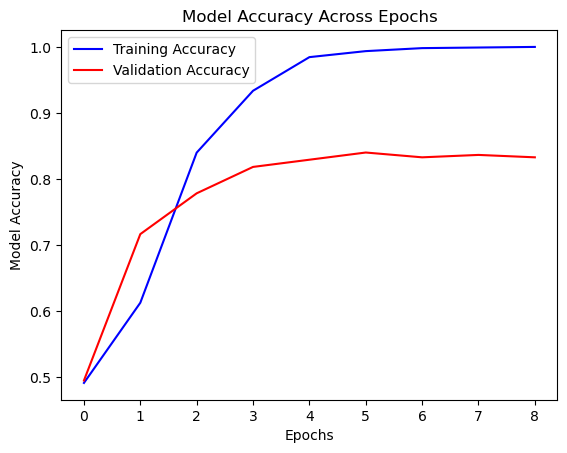

In [27]:
# Plot the values of the model accuracy from each epoch.
plt.plot(model_result.history['accuracy'], label="Training Accuracy", color='blue')
plt.plot(model_result.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.xlabel("Epochs")
plt.ylabel("Model Accuracy")
plt.title("Model Accuracy Across Epochs")
plt.legend()
plt.show()

## Plot the Training Model Loss

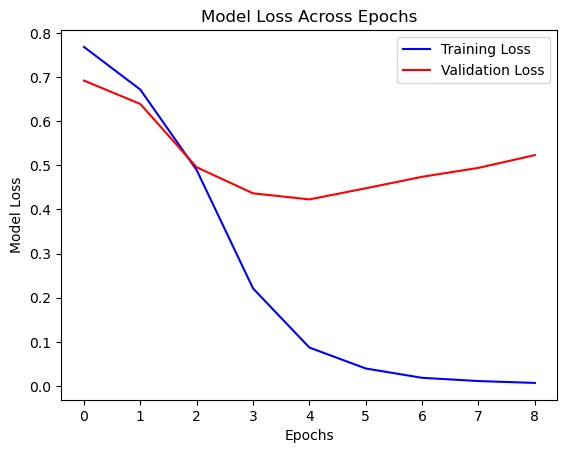

In [28]:
# Plot the values of the model loss from each epoch.
plt.plot(model_result.history['loss'], label="Training Loss", color='blue')
plt.plot(model_result.history['val_loss'], label='Validation Loss', color='red')
plt.xlabel("Epochs")
plt.ylabel("Model Loss")
plt.title("Model Loss Across Epochs")
plt.legend()
plt.show()

## Evaluate the Model

In [29]:
# Evaluate the model based on the test data.
eval_results = model.evaluate(x_test, y_test)
print(f'Model loss is {round(eval_results[0], 4)}.')
print(f'Model accuracy is {round(eval_results[1], 4)}.')

9/9 [==============================] - 0s 6ms/step - loss: 0.4973 - accuracy: 0.7855
Model loss is 0.4973.
Model accuracy is 0.7855.


## Predictions

In [30]:
# Make predictions based on the model and the test data.
predictions = model.predict(x_test)

9/9 [==============================] - 0s 6ms/step


In [31]:
# Define the predictions and review.
predicted_values = np.round(predictions).flatten().astype(int)
print(predicted_values)

[0 0 0 1 1 0 1 0 1 0 1 0 0 1 1 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 1 0 0 1 0
 0 1 1 0 0 0 0 1 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1 1 1 0 1 1 1 1 1 0 1 1 0 0
 1 1 0 1 1 0 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 1 1 1 1
 1 0 0 1 1 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 0
 0 0 1 1 0 0 1 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 1 0 1 0 0 1 1 1 0 1 0 0 1 1 0
 0 1 0 1 1 1 0 0 0 0 1 0 0 1 1 0 1 0 1 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1
 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 0 0
 0 1 1 0 1 0 0 0 1 1 1 0 1 1 0 1]


Confusion Matrix:
[[111  23]
 [ 36 105]]


ValueError: The number of FixedLocator locations (2), usually from a call to set_ticks, does not match the number of labels (2748).

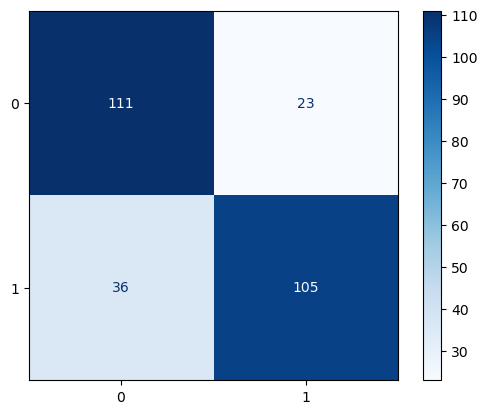

In [32]:
# Create a confusion matrix to review the predicted values versus the actual in the test data.
conf_matrix = confusion_matrix(y_test, predicted_values)

# Print the confusion matrix.
print("Confusion Matrix:")
print(conf_matrix)

# Visualize the confusion matrix.
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=labels)
disp.plot(cmap='Blues')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Confusion Matrix")
plt.show()